# Construct Trend, Seasonality, and Residual components
Feb 17th 2021

In [19]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from IPython.display import display
# Config:
pd.options.display.float_format = '{:,.2f}'.format
plotsize = (13, 5)
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plt.rcParams['figure.figsize']= plotsize
SEED=10

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_1/2_time_series_decomposition


In [3]:
time= np.arange(1,51)
time

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [6]:
trend= time * 2.75
trend

array([  2.75,   5.5 ,   8.25,  11.  ,  13.75,  16.5 ,  19.25,  22.  ,
        24.75,  27.5 ,  30.25,  33.  ,  35.75,  38.5 ,  41.25,  44.  ,
        46.75,  49.5 ,  52.25,  55.  ,  57.75,  60.5 ,  63.25,  66.  ,
        68.75,  71.5 ,  74.25,  77.  ,  79.75,  82.5 ,  85.25,  88.  ,
        90.75,  93.5 ,  96.25,  99.  , 101.75, 104.5 , 107.25, 110.  ,
       112.75, 115.5 , 118.25, 121.  , 123.75, 126.5 , 129.25, 132.  ,
       134.75, 137.5 ])

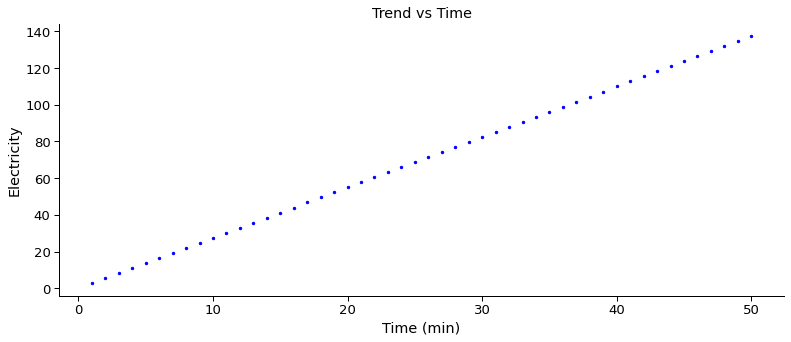

In [13]:
plt.plot(time, trend, 'b.')
plt.title('Trend vs Time')
plt.xlabel('Time (min)')
plt.ylabel('Electricity')
plt.show()

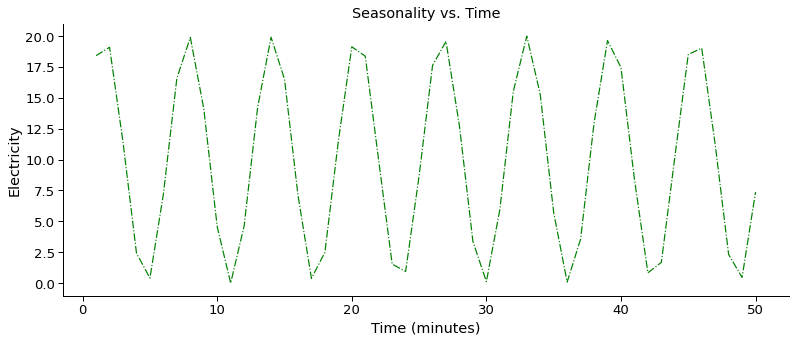

In [18]:
seasonal= 10+np.sin(time)*10
plt.plot(time, seasonal, 'g-.')
plt.title('Seasonality vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Electricity')
plt.show()

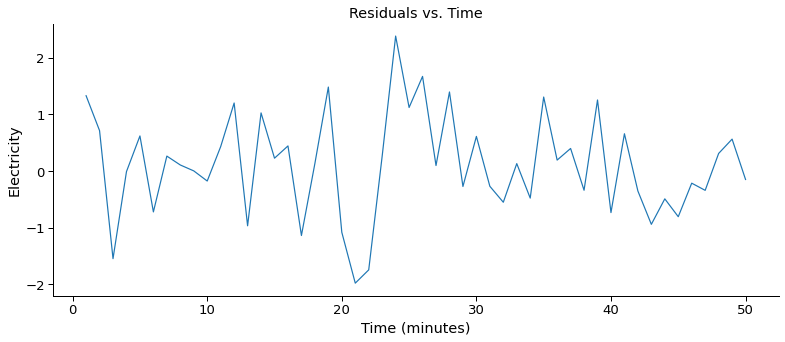

In [22]:
np.random.seed(SEED)
residual= np.random.normal(loc= 0.0, scale= 1, size= len(time)) #mean= 0, and sd= 1
plt.plot(time, residual)
plt.title('Residuals vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Electricity')
plt.show()

## Aggregate trend, seasonality, and residuals

### Additive model

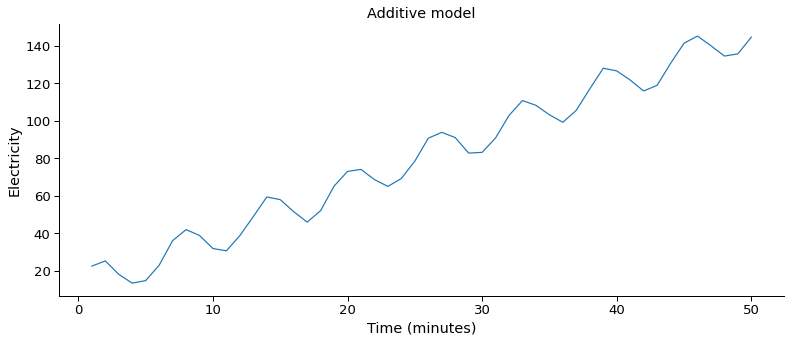

In [24]:
additive= trend + seasonal + residual
plt.plot(time, additive)
plt.title('Additive model')
plt.xlabel('Time (minutes)')
plt.ylabel('Electricity')
plt.show()

### Multiplicative models

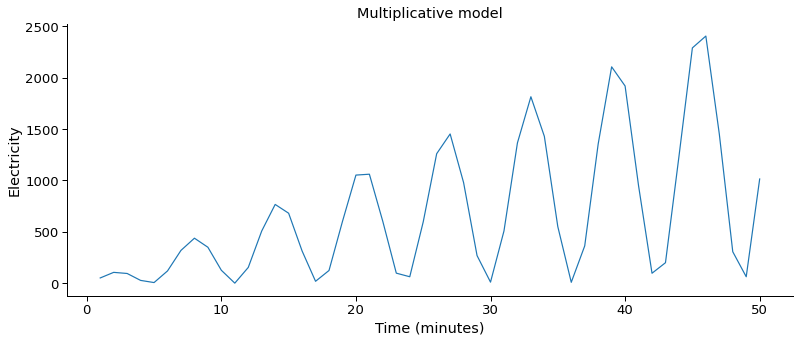

In [29]:
ignore_residuals= np.ones_like(residual)
multiplicative= trend * seasonal * ignore_residuals
plt.plot(time, multiplicative)
plt.title('Multiplicative model')
plt.xlabel('Time (minutes)')
plt.ylabel('Electricity')
plt.show()

## Analysis of new data

In [37]:
time= np.arange(0, 50)

data_path= '../course_data/2_time_series-decomposition-material/'
data_a= np.load(data_path+"dataset_A.npy")
data_b= np.load(data_path+"dataset_B.npy")

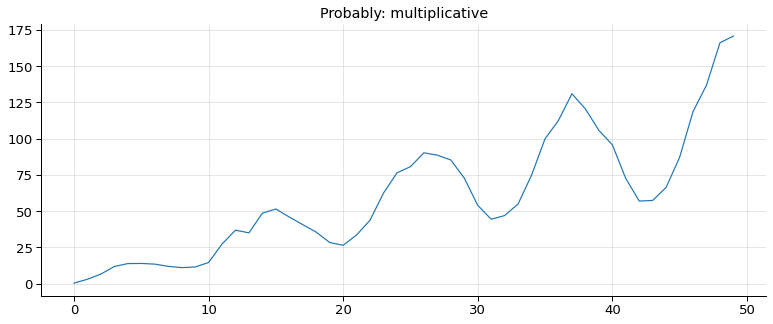

In [44]:
plt.plot(time, data_a)
plt.title("Probably: multiplicative")
plt.grid(alpha= 0.4)
plt.show()

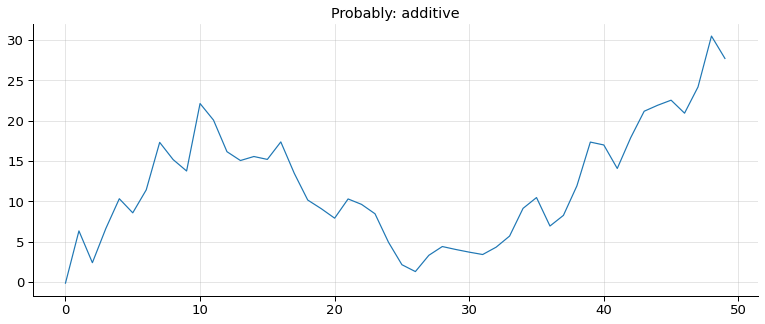

In [46]:
plt.plot(time, data_b)
plt.title("Probably: additive")
plt.grid(alpha= 0.4)
plt.show()